In [2]:
from pygam import LogisticGAM, s, l, f
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


import pandas as pd
import sklearn as skl
import numpy as np

from pygam import LogisticGAM, s, l, f, te, LinearGAM, GAM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

from pygam import LogisticGAM, s, l, f
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression

import matplotlib.ticker as mtick
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [ ]:
mimic_path = "mimic_static.csv"
df_mimic = pd.read_csv(mimic_path)

#prepare test data for median temp
y=df_mimic["hosp_death"].to_frame()
X= df_mimic[["median_temp","age", "gender","apsiii", "dialysis", "vasopressor", "steroids", "ventilation","sofa","charlson"]]

median_age = np.median(X.age)
median_apsiii = np.median(X.apsiii)
median_gender = np.median(X.gender)
median_dialysis = np.median(X.dialysis)
median_vasopressor = np.median(X.vasopressor)
median_steroids = np.median(X.steroids)
median_ventilation = np.median(X.ventilation)
median_sofa = np.median(X.sofa)
median_charlson = np.median(X.charlson)

age_vec = [median_age] * 100
apsiii_vec = [median_apsiii] * 100
gender_vec = [median_gender] * 100
dialysis_vec = [median_dialysis] * 100
vasopressor_vec = [median_vasopressor] * 100
steroids_vec = [median_steroids] * 100
ventilation_vec = [median_ventilation] * 100
sofa_vec = [median_sofa] * 100
charlson_vec = [median_charlson] * 100
prop_vec = np.arange(0,100)



<Figure size 432x288 with 0 Axes>

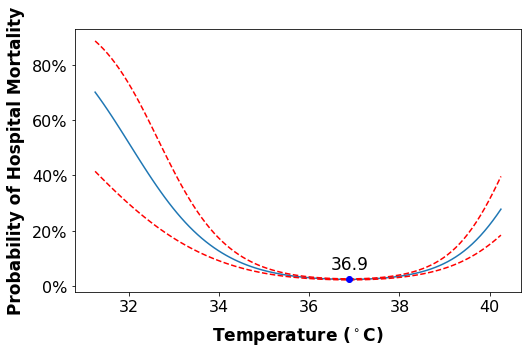

In [ ]:
median_temp_x_axis = np.linspace(min(df_mimic.median_temp),max(df_mimic.median_temp),100)
test = pd.DataFrame({'median_temp':median_temp_x_axis,'age':age_vec, 'gender':gender_vec, 'apsiii':apsiii_vec, 'dialysis':dialysis_vec, 'vasopressor':vasopressor_vec,'steroids':steroids_vec,
                     'ventilation': ventilation_vec, 'sofa':sofa_vec, 'charlson':charlson_vec})

y=df_mimic["hosp_death"].to_frame()
X= df_mimic[["median_temp","age", "gender","apsiii", "dialysis", "vasopressor", "steroids", "ventilation","sofa","charlson"]]
gam = LogisticGAM(terms=(s(0, n_splines = 6) + l(1) + f(2) + l(3) + f(4)+ f(5) + f(6) +f(7) +l(8) +l(9) )).fit(X, y)

#am = LogisticGAM(terms=(s(0, n_splines = 9))).fit(X, y) #unadjusted


plt.figure();
fig, axs = plt.subplots(1);
fig.set_figwidth(8)
fig.set_figheight(5)
fig.subplots_adjust(bottom=0.15)

titles = ["Median Temp",  "Age", "Gender", "Apsiii", "Dialysis", "Vasopressor", "Steroids", "Ventilation", "SOFA Score", "Charlson Score"]

XX = gam.generate_X_grid(term=0)

gam_predictions = gam.predict_mu(test) * 100
gam_ci = gam.confidence_intervals(test) *100

ix = np.argmin(gam_predictions)
x_min = median_temp_x_axis[ix]

i_term=0

axs.plot(median_temp_x_axis, gam_predictions,label='_nolegend_')
axs.plot(median_temp_x_axis, gam_ci, c='r', ls='--')

y_min = gam_predictions[ix]
axs.plot(x_min, y_min, 'bo')

axs.annotate(round(x_min, 1), # this is the text
            (x_min,y_min), # these are the coordinates to position the label
            textcoords="offset points", # how to position the text
            xytext=(0,10), # distance from text to points (x,y)
            ha='center',size=17)
    
axs.yaxis.set_major_formatter(mtick.PercentFormatter())


#axs.set_title(titles[0], fontsize=14)
axs.tick_params(axis="x", labelsize=16)
axs.tick_params(axis="y", labelsize=16)
#axs.legend(["95% CI"], loc="upper right", prop={'size': 10})
axs.set_xlabel("Temperature ($^\circ$C)",size=17,fontweight="bold",labelpad=10)
axs.set_ylabel("Probability of Hospital Mortality", size=17, fontweight="bold",labelpad=7)
#axs.set_title("Median Temp vs Hospital Mortality (MIMIC)", fontsize=14)

fig.align_labels()

fig.savefig('mimic_median_temp.png')

## mimic temp gap

<Figure size 432x288 with 0 Axes>

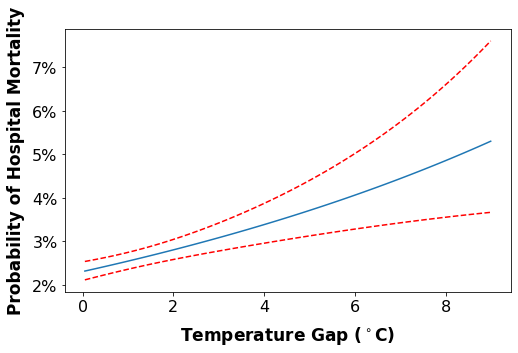

In [ ]:
temp_gap_x_axis = np.linspace(min(df_mimic.temp_gap),max(df_mimic.temp_gap),100)
test = pd.DataFrame({'temp_gap':temp_gap_x_axis,'age':age_vec, 'gender':gender_vec, 'apsiii':apsiii_vec, 'dialysis':dialysis_vec, 'vasopressor':vasopressor_vec,'steroids':steroids_vec,
                     'ventilation': ventilation_vec, 'sofa':sofa_vec, 'charlson':charlson_vec})


y=df_mimic["hosp_death"].to_frame()
X= df_mimic[["temp_gap","age", "gender","apsiii", "dialysis", "vasopressor", "steroids", "ventilation", "sofa","charlson"]]
gam = LogisticGAM(terms=(s(0, n_splines = 4) + l(1) + f(2) + l(3) + f(4)+ f(5) +f(6) +f(7) + l(8) +l(9))).fit(X, y)


plt.figure();
fig, axs = plt.subplots(1);
fig.set_figwidth(8)
fig.set_figheight(5)
fig.subplots_adjust(bottom=0.15)


XX = gam.generate_X_grid(term=0)
gam_predictions = gam.predict_mu(test) * 100
gam_ci = gam.confidence_intervals(test) *100

i_term=0
y_logits = gam.partial_dependence(term=i_term, X=XX)
y_probability = (np.exp(y_logits)/(1+np.exp(y_logits)) ) *100

y_ci_logits = gam.partial_dependence(term=i_term, X=XX, width=.95)[1]
y_ci_probability = (np.exp(y_ci_logits)/(1+np.exp(y_ci_logits)) ) *100

axs.plot(temp_gap_x_axis, gam_predictions,label='_nolegend_')
axs.plot(temp_gap_x_axis, gam_ci, c='r', ls='--')

#axs.set_title("Temp Gap vs Hospital Mortality (MIMIC)", fontsize=14)
#axs.set_ylim([0, 50])
axs.tick_params(axis="x", labelsize=16)
axs.tick_params(axis="y", labelsize=16)
#axs.legend(["95% CI"], loc="upper right", prop={'size': 10})
axs.set_xlabel("Temperature Gap ($^\circ$C)",size=17, fontweight="bold",labelpad=10)
axs.set_ylabel("Probability of Hospital Mortality", size=17, fontweight="bold",labelpad=7)
axs.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))


fig.align_labels()
fig.savefig('mimic_tempgap.png')

## mimic 36-38

<Figure size 432x288 with 0 Axes>

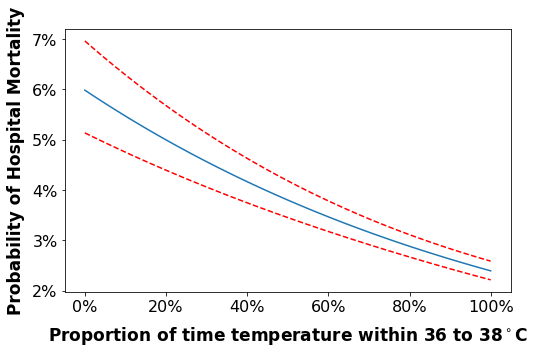

In [ ]:
y=df_mimic["hosp_death"].to_frame()
X = df_mimic[["prop_36_38", "age", "gender","apsiii", "dialysis", "vasopressor", "steroids", "ventilation", "sofa","charlson"]]
#gam = LogisticGAM(terms=(s(0, n_splines = 4) + l(1) + f(2) + l(3) + f(4) + f(5) + f(6) + f(7) +l(8) +l(9))).fit(X, y)

gam = LogisticGAM(terms=(l(0) + l(1) + f(2) + l(3) + f(4)+ f(5) +f(6) +f(7) + l(8) +l(9))).fit(X, y)
#gam = LogisticGAM(terms=(l(0))).fit(X, y)

test = pd.DataFrame({'prop_36_38':prop_vec,'age':age_vec, 'gender':gender_vec, 'apsiii':apsiii_vec, 'dialysis':dialysis_vec, 'vasopressor':vasopressor_vec,'steroids':steroids_vec,
                     'ventilation': ventilation_vec, 'sofa':sofa_vec, 'charlson':charlson_vec})

gam_predictions = gam.predict_mu(test) * 100
gam_ci = gam.confidence_intervals(test) *100

plt.figure();
fig, axs = plt.subplots(1);
fig.set_figwidth(8)
fig.set_figheight(5)
fig.subplots_adjust(bottom=0.15)


XX = gam.generate_X_grid(term=0)
#axs.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX),label='_nolegend_')
#axs.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX, width=.95)[1], c='r', ls='--')

i_term=0
y_logits = gam.partial_dependence(term=i_term, X=XX)
y_probability = (np.exp(y_logits)/(1+np.exp(y_logits)) ) *100

y_ci_logits = gam.partial_dependence(term=i_term, X=XX, width=.95)[1]
y_ci_probability = (np.exp(y_ci_logits)/(1+np.exp(y_ci_logits)) ) *100

axs.plot(XX[:, i_term], gam_predictions,label='_nolegend_')
axs.plot(XX[:, i_term], gam_ci, c='r', ls='--')

#axs.set_title("Hospital Mortality vs proportion of time within 36-38$^\circ$C (MIMIC)", fontsize=14)
axs.tick_params(axis="x", labelsize=16)
axs.tick_params(axis="y", labelsize=16)
#axs.legend(["95% CI"], loc="upper right", prop={'size': 10})
axs.set_xlabel("Proportion of time temperature within 36 to 38$^\circ$C",size=17, fontweight="bold",labelpad=10)
axs.set_ylabel("Probability of Hospital Mortality", size=17, fontweight="bold",labelpad=7)
axs.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
axs.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

fig.align_labels()
plt.savefig('mimic_prop3638.png')

## mimic < 36

<Figure size 432x288 with 0 Axes>

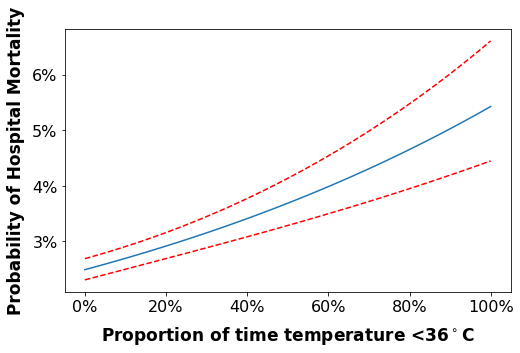

In [ ]:
y=df_mimic["hosp_death"].to_frame()
X = df_mimic[["prop_below_36", "age", "gender","apsiii", "dialysis", "vasopressor", "steroids", "ventilation", "sofa","charlson"]]
#gam = LogisticGAM(terms=(s(0, n_splines = 4) + l(1) + f(2) + l(3) + f(4) + f(5) + f(6) + f(7) +l(8) +l(9))).fit(X, y)

gam = LogisticGAM(terms=(l(0) + l(1) + f(2) + l(3) + f(4)+ f(5) +f(6) +f(7) + l(8) +l(9))).fit(X, y)
#gam = LogisticGAM(terms=(l(0))).fit(X, y)

test = pd.DataFrame({'prop_below_36':prop_vec,'age':age_vec, 'gender':gender_vec, 'apsiii':apsiii_vec, 'dialysis':dialysis_vec, 'vasopressor':vasopressor_vec,'steroids':steroids_vec,
                     'ventilation': ventilation_vec, 'sofa':sofa_vec, 'charlson':charlson_vec})

gam_predictions = gam.predict_mu(test) * 100
gam_ci = gam.confidence_intervals(test) *100

plt.figure();
fig, axs = plt.subplots(1);
fig.set_figwidth(8)
fig.set_figheight(5)
fig.subplots_adjust(bottom=0.15)


XX = gam.generate_X_grid(term=0)
#axs.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX),label='_nolegend_')
#axs.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX, width=.95)[1], c='r', ls='--')

i_term=0
y_logits = gam.partial_dependence(term=i_term, X=XX)
y_probability = (np.exp(y_logits)/(1+np.exp(y_logits)) ) *100

y_ci_logits = gam.partial_dependence(term=i_term, X=XX, width=.95)[1]
y_ci_probability = (np.exp(y_ci_logits)/(1+np.exp(y_ci_logits)) ) *100

axs.plot(XX[:, i_term], gam_predictions,label='_nolegend_')
axs.plot(XX[:, i_term], gam_ci, c='r', ls='--')

#axs.set_title("Hospital Mortality vs proportion of time below 36$^\circ$C (MIMIC)", fontsize=14)
axs.tick_params(axis="x", labelsize=16)
axs.tick_params(axis="y", labelsize=16)
#axs.legend(["95% CI"], loc="upper right", prop={'size': 10})
axs.set_xlabel("Proportion of time temperature <36$^\circ$C",size=17, fontweight="bold",labelpad=10)
axs.set_ylabel("Probability of Hospital Mortality", size=17, fontweight="bold",labelpad=7)
axs.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
axs.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

fig.align_labels()
plt.savefig('mimic_prop36.png')

## mimic > 38

<Figure size 432x288 with 0 Axes>

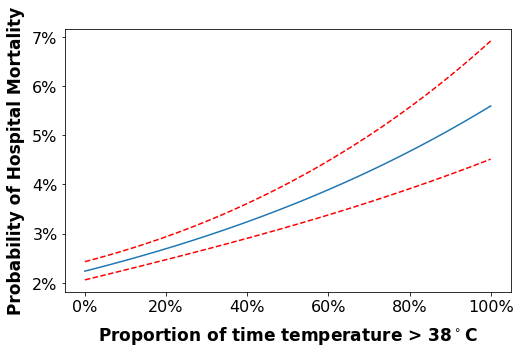

In [ ]:
y=df_mimic["hosp_death"].to_frame()
X = df_mimic[["prop_above_38", "age", "gender","apsiii", "dialysis", "vasopressor", "steroids", "ventilation", "sofa","charlson"]]
#gam = LogisticGAM(terms=(s(0, n_splines = 4) + l(1) + f(2) + l(3) + f(4) + f(5) + f(6) + f(7) +l(8) +l(9))).fit(X, y)

gam = LogisticGAM(terms=(l(0) + l(1) + f(2) + l(3) + f(4)+ f(5) +f(6) +f(7) + l(8) +l(9))).fit(X, y)
#gam = LogisticGAM(terms=(l(0))).fit(X, y)

test = pd.DataFrame({'prop_above_38':prop_vec,'age':age_vec, 'gender':gender_vec, 'apsiii':apsiii_vec, 'dialysis':dialysis_vec, 'vasopressor':vasopressor_vec,'steroids':steroids_vec,
                     'ventilation': ventilation_vec, 'sofa':sofa_vec, 'charlson':charlson_vec})

gam_predictions = gam.predict_mu(test) * 100
gam_ci = gam.confidence_intervals(test) *100

plt.figure();
fig, axs = plt.subplots(1);
fig.set_figwidth(8)
fig.set_figheight(5)
fig.subplots_adjust(bottom=0.15)


XX = gam.generate_X_grid(term=0)
#axs.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX),label='_nolegend_')
#axs.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX, width=.95)[1], c='r', ls='--')

i_term=0
y_logits = gam.partial_dependence(term=i_term, X=XX)
y_probability = (np.exp(y_logits)/(1+np.exp(y_logits)) ) *100

y_ci_logits = gam.partial_dependence(term=i_term, X=XX, width=.95)[1]
y_ci_probability = (np.exp(y_ci_logits)/(1+np.exp(y_ci_logits)) ) *100

axs.plot(XX[:, i_term], gam_predictions,label='_nolegend_')
axs.plot(XX[:, i_term], gam_ci, c='r', ls='--')

#axs.set_title("Hospital Mortality vs proportion of time above 38$^\circ$C (MIMIC)", fontsize=14)
axs.tick_params(axis="x", labelsize=16)
axs.tick_params(axis="y", labelsize=16)
#axs.legend(["95% CI"], loc="upper right", prop={'size': 10})
axs.set_xlabel("Proportion of time temperature > 38$^\circ$C",size=17, fontweight="bold" ,labelpad=10)
axs.set_ylabel("Probability of Hospital Mortality", size=17, fontweight="bold",labelpad=7)
axs.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
axs.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

fig.align_labels()
plt.savefig('mimic_prop38.png')

## eICU

In [ ]:
merged_path = "eicu_static_final_reliable.csv"
df_eicu = pd.read_csv(merged_path)

#prepare test data for median temp
y=df_eicu["hosp_death"].to_frame()
X= df_eicu[["median_temp","age", "gender","apsiii", "dialysis", "vasopressor", "steroids", "ventilation","sofa","charlson"]]

median_age = np.median(X.age)
median_apsiii = np.median(X.apsiii)
median_gender = np.median(X.gender)
median_dialysis = np.median(X.dialysis)
median_vasopressor = np.median(X.vasopressor)
median_steroids = np.median(X.steroids)
median_ventilation = np.median(X.ventilation)
median_sofa = np.median(X.sofa)
median_charlson = np.median(X.charlson)

age_vec = [median_age] * 100
apsiii_vec = [median_apsiii] * 100
gender_vec = [median_gender] * 100
dialysis_vec = [median_dialysis] * 100
vasopressor_vec = [median_vasopressor] * 100
steroids_vec = [median_steroids] * 100
ventilation_vec = [median_ventilation] * 100
sofa_vec = [median_sofa] * 100
charlson_vec = [median_charlson] * 100
prop_vec = np.arange(0,100)



<Figure size 432x288 with 0 Axes>

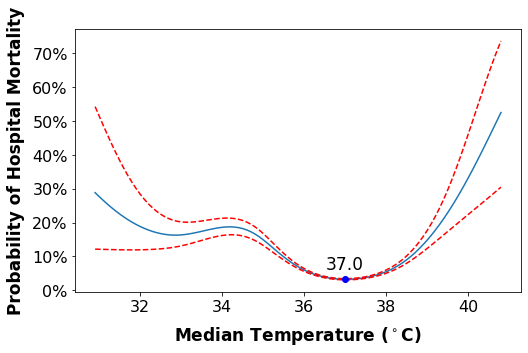

In [ ]:
median_temp_x_axis = np.linspace(min(df_eicu.median_temp),max(df_eicu.median_temp),100)
test = pd.DataFrame({'median_temp':median_temp_x_axis,'age':age_vec, 'gender':gender_vec, 'apsiii':apsiii_vec, 'dialysis':dialysis_vec, 'vasopressor':vasopressor_vec,'steroids':steroids_vec,
                     'ventilation': ventilation_vec, 'sofa':sofa_vec, 'charlson':charlson_vec})

y=df_eicu["hosp_death"].to_frame()
X= df_eicu[["median_temp","age", "gender","apsiii", "dialysis", "vasopressor", "steroids", "ventilation","sofa","charlson"]]
gam = LogisticGAM(terms=(s(0, n_splines = 8) + l(1) + f(2) + l(3) + f(4)+ f(5) + f(6) +f(7) +l(8) +l(9) )).fit(X, y)

#gam = LogisticGAM(terms=(s(0, n_splines = 8))).fit(X, y) #unadjusted


plt.figure();
fig, axs = plt.subplots(1);
fig.set_figwidth(8)
fig.set_figheight(5)
fig.subplots_adjust(bottom=0.15)

titles = ["Median Temp",  "Age", "Gender", "Apsiii", "Dialysis", "Vasopressor", "Steroids", "Ventilation", "SOFA Score", "Charlson Score"]

XX = gam.generate_X_grid(term=0)

gam_predictions = gam.predict_mu(test) * 100
gam_ci = gam.confidence_intervals(test) *100

ix = np.argmin(gam_predictions)
x_min = median_temp_x_axis[ix]

i_term=0

axs.plot(median_temp_x_axis, gam_predictions,label='_nolegend_')
axs.plot(median_temp_x_axis, gam_ci, c='r', ls='--')

y_min = gam_predictions[ix]
axs.plot(x_min, y_min, 'bo')

axs.annotate(round(x_min, 1), # this is the text
            (x_min,y_min), # these are the coordinates to position the label
            textcoords="offset points", # how to position the text
            xytext=(0,10), # distance from text to points (x,y)
            ha='center', size=17)
    
axs.yaxis.set_major_formatter(mtick.PercentFormatter())


#axs.set_title(titles[0], fontsize=14)
axs.tick_params(axis="x", labelsize=16)
axs.tick_params(axis="y", labelsize=16)
#axs.legend(["95% CI"], loc="upper right", prop={'size': 10})
axs.set_xlabel("Median Temperature ($^\circ$C)",size=17, fontweight="bold", labelpad=10)
axs.set_ylabel("Probability of Hospital Mortality", size=17, fontweight="bold", labelpad=7)
#axs.set_title("Median Temp vs Hospital Mortality (eICU)")

fig.align_labels()

fig.savefig('eicu_median_temp.png')

## eICU temp gap

<Figure size 432x288 with 0 Axes>

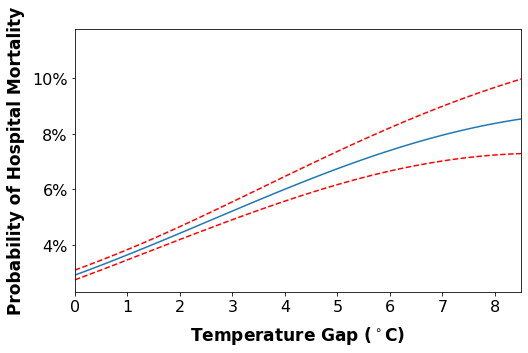

In [ ]:
temp_gap_x_axis = np.linspace(min(df_eicu.temp_gap),max(df_eicu.temp_gap),100)
test = pd.DataFrame({'temp_gap':temp_gap_x_axis,'age':age_vec, 'gender':gender_vec, 'apsiii':apsiii_vec, 'dialysis':dialysis_vec, 'vasopressor':vasopressor_vec,'steroids':steroids_vec,
                     'ventilation': ventilation_vec, 'sofa':sofa_vec, 'charlson':charlson_vec})


y=df_eicu["hosp_death"].to_frame()
X= df_eicu[["temp_gap","age", "gender","apsiii", "dialysis", "vasopressor", "steroids", "ventilation", "sofa","charlson"]]
gam = LogisticGAM(terms=(s(0, n_splines = 4) + l(1) + f(2) + l(3) + f(4)+ f(5) +f(6) +f(7) + l(8) +l(9))).fit(X, y)


plt.figure();
fig, axs = plt.subplots(1);
fig.set_figwidth(8)
fig.set_figheight(5)
fig.subplots_adjust(bottom=0.15)


XX = gam.generate_X_grid(term=0)
gam_predictions = gam.predict_mu(test) * 100
gam_ci = gam.confidence_intervals(test) *100

i_term=0
y_logits = gam.partial_dependence(term=i_term, X=XX)
y_probability = (np.exp(y_logits)/(1+np.exp(y_logits)) ) *100

y_ci_logits = gam.partial_dependence(term=i_term, X=XX, width=.95)[1]
y_ci_probability = (np.exp(y_ci_logits)/(1+np.exp(y_ci_logits)) ) *100

axs.plot(temp_gap_x_axis, gam_predictions,label='_nolegend_')
axs.plot(temp_gap_x_axis, gam_ci, c='r', ls='--')

#axs.set_title("Temp Gap vs Hospital Mortality (eICU)", fontsize=14)
#axs.set_ylim([0, 50])
axs.tick_params(axis="x", labelsize=16)
axs.tick_params(axis="y", labelsize=16)
#axs.legend(["95% CI"], loc="upper right", prop={'size': 10})
axs.set_xlabel("Temperature Gap ($^\circ$C)",size=17, fontweight="bold",labelpad=10)
axs.set_ylabel("Probability of Hospital Mortality", size=17, fontweight="bold",labelpad=7)
axs.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
axs.set_xlim(0,8.5)


fig.align_labels()
fig.savefig('eicu_tempgap.png')

## eICU 36-38

<Figure size 432x288 with 0 Axes>

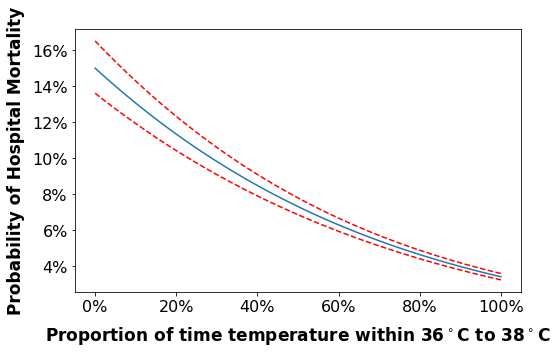

In [ ]:
y=df_eicu["hosp_death"].to_frame()
X = df_eicu[["prop_36_38", "age", "gender","apsiii", "dialysis", "vasopressor", "steroids", "ventilation", "sofa","charlson"]]
#gam = LogisticGAM(terms=(s(0, n_splines = 4) + l(1) + f(2) + l(3) + f(4) + f(5) + f(6) + f(7) +l(8) +l(9))).fit(X, y)

gam = LogisticGAM(terms=(l(0) + l(1) + f(2) + l(3) + f(4)+ f(5) +f(6) +f(7) + l(8) +l(9))).fit(X, y)
#gam = LogisticGAM(terms=(l(0))).fit(X, y)

test = pd.DataFrame({'prop_36_38':prop_vec,'age':age_vec, 'gender':gender_vec, 'apsiii':apsiii_vec, 'dialysis':dialysis_vec, 'vasopressor':vasopressor_vec,'steroids':steroids_vec,
                     'ventilation': ventilation_vec, 'sofa':sofa_vec, 'charlson':charlson_vec})

gam_predictions = gam.predict_mu(test) * 100
gam_ci = gam.confidence_intervals(test) *100

plt.figure();
fig, axs = plt.subplots(1);
fig.set_figwidth(8)
fig.set_figheight(5)
fig.subplots_adjust(bottom=0.15)


XX = gam.generate_X_grid(term=0)

i_term=0
y_logits = gam.partial_dependence(term=i_term, X=XX)
y_probability = (np.exp(y_logits)/(1+np.exp(y_logits)) ) *100

y_ci_logits = gam.partial_dependence(term=i_term, X=XX, width=.95)[1]
y_ci_probability = (np.exp(y_ci_logits)/(1+np.exp(y_ci_logits)) ) *100

axs.plot(XX[:, i_term], gam_predictions,label='_nolegend_')
axs.plot(XX[:, i_term], gam_ci, c='r', ls='--')

#axs.set_title("Hospital Mortality vs proportion of time within 36-38$^\circ$C (eICU)", fontsize=14)
axs.tick_params(axis="x", labelsize=16)
axs.tick_params(axis="y", labelsize=16)
#axs.legend(["95% CI"], loc="upper right", prop={'size': 10})
axs.set_xlabel("Proportion of time temperature within 36$^\circ$C to 38$^\circ$C ",size=17, fontweight="bold",labelpad=10)
axs.set_ylabel("Probability of Hospital Mortality", size=17, fontweight="bold", labelpad=7)
axs.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
axs.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

fig.align_labels()
plt.savefig('eicu_prop3638.png')

## eICU < 36

<Figure size 432x288 with 0 Axes>

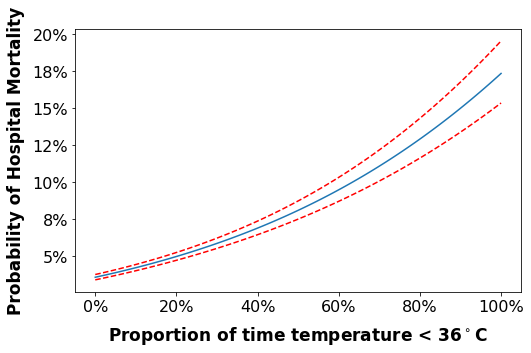

In [ ]:
y=df_eicu["hosp_death"].to_frame()
X = df_eicu[["prop_below_36", "age", "gender","apsiii", "dialysis", "vasopressor", "steroids", "ventilation", "sofa","charlson"]]
#gam = LogisticGAM(terms=(s(0, n_splines = 4) + l(1) + f(2) + l(3) + f(4) + f(5) + f(6) + f(7) +l(8) +l(9))).fit(X, y)

gam = LogisticGAM(terms=(l(0) + l(1) + f(2) + l(3) + f(4)+ f(5) +f(6) +f(7) + l(8) +l(9))).fit(X, y)
#gam = LogisticGAM(terms=(l(0))).fit(X, y)

test = pd.DataFrame({'prop_below_36':prop_vec,'age':age_vec, 'gender':gender_vec, 'apsiii':apsiii_vec, 'dialysis':dialysis_vec, 'vasopressor':vasopressor_vec,'steroids':steroids_vec,
                     'ventilation': ventilation_vec, 'sofa':sofa_vec, 'charlson':charlson_vec})

gam_predictions = gam.predict_mu(test) * 100
gam_ci = gam.confidence_intervals(test) *100

plt.figure();
fig, axs = plt.subplots(1);
fig.set_figwidth(8)
fig.set_figheight(5)
fig.subplots_adjust(bottom=0.15)



XX = gam.generate_X_grid(term=0)
#axs.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX),label='_nolegend_')
#axs.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX, width=.95)[1], c='r', ls='--')

i_term=0
y_logits = gam.partial_dependence(term=i_term, X=XX)
y_probability = (np.exp(y_logits)/(1+np.exp(y_logits)) ) *100

y_ci_logits = gam.partial_dependence(term=i_term, X=XX, width=.95)[1]
y_ci_probability = (np.exp(y_ci_logits)/(1+np.exp(y_ci_logits)) ) *100

axs.plot(XX[:, i_term], gam_predictions,label='_nolegend_')
axs.plot(XX[:, i_term], gam_ci, c='r', ls='--')

#axs.set_title("Hospital Mortality vs proportion of time below 36$^\circ$C (eICU)", fontsize=14)
axs.tick_params(axis="x", labelsize=16)
axs.tick_params(axis="y", labelsize=16)
#axs.legend(["95% CI"], loc="upper right", prop={'size': 10})
axs.set_xlabel("Proportion of time temperature < 36$^\circ$C",size=17, fontweight="bold", labelpad=10)
axs.set_ylabel("Probability of Hospital Mortality", size=17, fontweight="bold", labelpad=7)
axs.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
axs.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
fig.align_labels()
plt.savefig('eicu_prop36.png')

## eICU > 38

<Figure size 432x288 with 0 Axes>

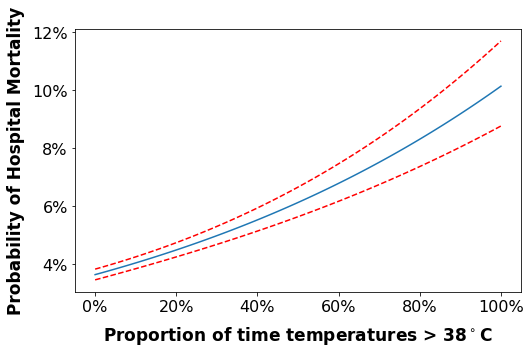

In [ ]:
y=df_eicu["hosp_death"].to_frame()
X = df_eicu[["prop_above_38", "age", "gender","apsiii", "dialysis", "vasopressor", "steroids", "ventilation", "sofa","charlson"]]
#gam = LogisticGAM(terms=(s(0, n_splines = 4) + l(1) + f(2) + l(3) + f(4) + f(5) + f(6) + f(7) +l(8) +l(9))).fit(X, y)

gam = LogisticGAM(terms=(l(0) + l(1) + f(2) + l(3) + f(4)+ f(5) +f(6) +f(7) + l(8) +l(9))).fit(X, y)
#gam = LogisticGAM(terms=(l(0))).fit(X, y)

test = pd.DataFrame({'prop_above_38':prop_vec,'age':age_vec, 'gender':gender_vec, 'apsiii':apsiii_vec, 'dialysis':dialysis_vec, 'vasopressor':vasopressor_vec,'steroids':steroids_vec,
                     'ventilation': ventilation_vec, 'sofa':sofa_vec, 'charlson':charlson_vec})

gam_predictions = gam.predict_mu(test) * 100
gam_ci = gam.confidence_intervals(test) *100

plt.figure();
fig, axs = plt.subplots(1);
fig.set_figwidth(8)
fig.set_figheight(5)
fig.subplots_adjust(bottom=0.15)


XX = gam.generate_X_grid(term=0)
#axs.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX),label='_nolegend_')
#axs.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX, width=.95)[1], c='r', ls='--')

i_term=0
y_logits = gam.partial_dependence(term=i_term, X=XX)
y_probability = (np.exp(y_logits)/(1+np.exp(y_logits)) ) *100

y_ci_logits = gam.partial_dependence(term=i_term, X=XX, width=.95)[1]
y_ci_probability = (np.exp(y_ci_logits)/(1+np.exp(y_ci_logits)) ) *100

axs.plot(XX[:, i_term], gam_predictions,label='_nolegend_')
axs.plot(XX[:, i_term], gam_ci, c='r', ls='--')

#axs.set_title("Hospital Mortality vs proportion of time above 38$^\circ$C (eICU)", fontsize=14)
axs.tick_params(axis="x", labelsize=16)
axs.tick_params(axis="y", labelsize=16)
#axs.legend(["95% CI"], loc="upper right", prop={'size': 10})
axs.set_xlabel("Proportion of time temperatures > 38$^\circ$C",size=17, fontweight="bold", labelpad=10)
axs.set_ylabel("Probability of Hospital Mortality", size=17, fontweight="bold", labelpad=7)
axs.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
axs.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))



fig.align_labels()
plt.savefig('eicu_prop38.png')